# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
import optuna.visualization as vis
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


# Getting Data

In [2]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv")

# EDA : Exploratory Data Analysis

In [3]:
df_copy=df.copy()

In [4]:
df_copy.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df_copy.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
df_copy.shape

(2059, 20)

In [8]:
df_copy.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1900,Audi,Q3 35 TDI Premium Plus + Sunroof,1875000,2016,40000,Diesel,Automatic,Delhi,White,First,Individual,1968 cc,174 bhp @ 4200 rpm,380 Nm @ 1750 rpm,AWD,4385.0,1831.0,1608.0,5.0,64.0
340,Kia,Seltos GTX Plus AT 1.4 [2019-2020],1625000,2021,16000,Petrol,Automatic,Kolkata,Red,First,Individual,1353 cc,138 bhp @ 6000 rpm,242 Nm @ 1500 rpm,FWD,4315.0,1800.0,1645.0,5.0,50.0
877,Maruti Suzuki,Wagon R LXI CNG (O),310000,2014,82000,CNG,Manual,Lucknow,White,First,Individual,998 cc,58 bhp @ 6200 rpm,77 Nm @ 3500 rpm,FWD,3599.0,1495.0,1700.0,5.0,35.0
27,Honda,Brio V MT,351000,2014,39276,Petrol,Manual,Mumbai,Red,First,Individual,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3610.0,1680.0,1500.0,5.0,35.0
1198,Audi,Q7 45 TDI Premium Plus,5500000,2017,24000,Diesel,Automatic,Gurgaon,White,First,Individual,2967 cc,245 bhp @ 2910 rpm,600 Nm @ 1500 rpm,AWD,5052.0,1968.0,1740.0,7.0,75.0


In [9]:
# Removing unit from Engine column
df_copy['Engine'] = df_copy['Engine'].astype(str).str.replace(r'\s*cc\s*', '', regex=True).astype(float)

In [10]:
df_copy.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [11]:
cat_col = ['Make','Fuel Type','Transmission','Location','Color','Owner','Seller Type','Engine','Max Power','Max Torque','Drivetrain'] 
num_col = ['Price','Year','Kilometer','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']

## Kdeplots for checking skewness

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


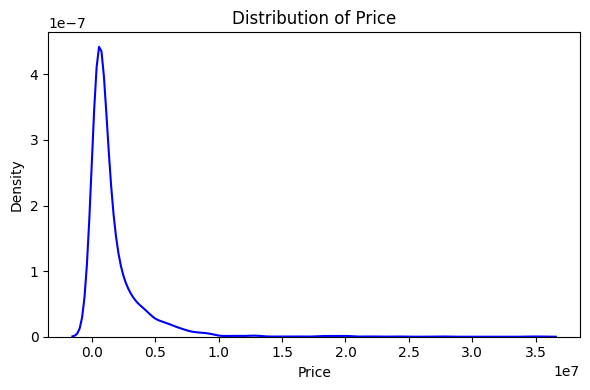

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


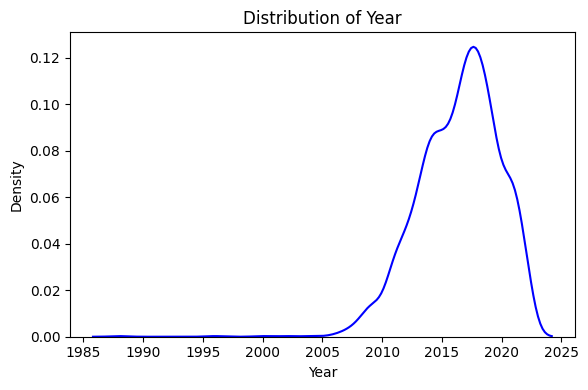

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


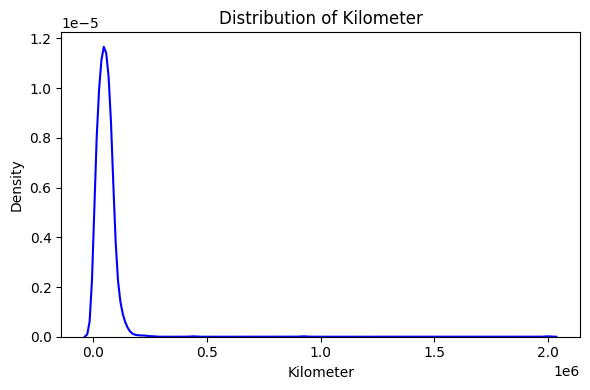

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


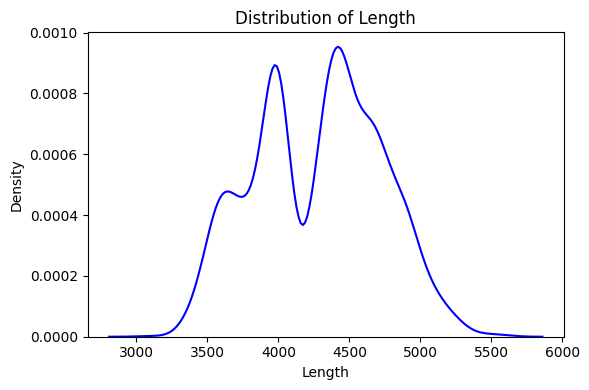

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


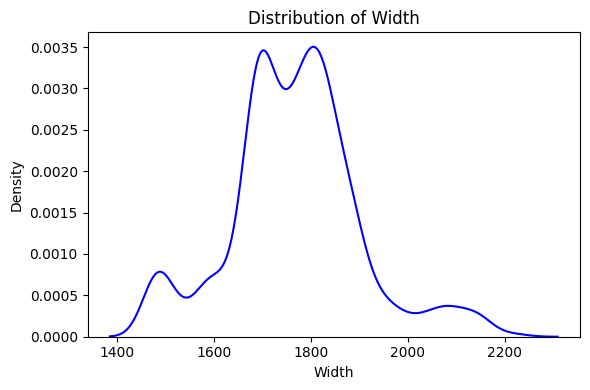

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


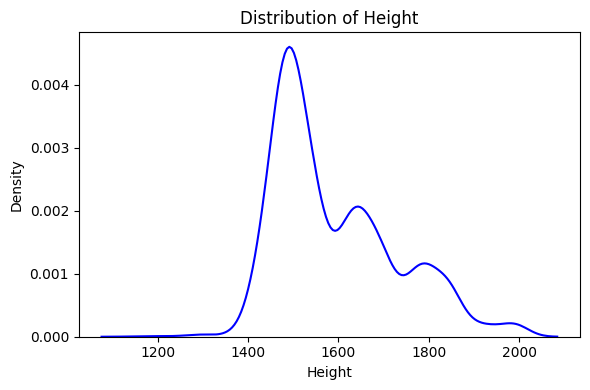

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


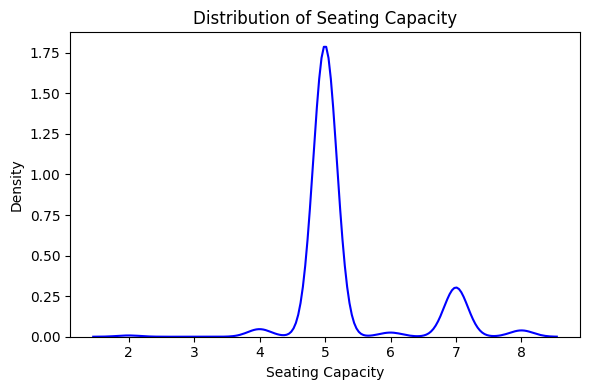

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


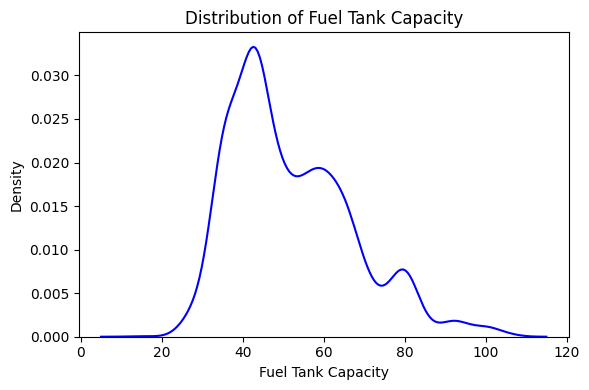

In [12]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_copy[col], color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

## Correlation Analysis

In [13]:
df_copy.corr

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.corr of                Make                                  Model    Price  Year  \
0             Honda                    Amaze 1.2 VX i-VTEC   505000  2017   
1     Maruti Suzuki                        Swift DZire VDI   450000  2014   
2           Hyundai                   i10 Magna 1.2 Kappa2   220000  2011   
3            Toyota                               Glanza G   799000  2019   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]  1950000  2018   
...             ...                                    ...      ...   ...   
2054       Mahindra                  XUV500 W8 [2015-2017]   850000  2016   
2055        Hyundai                           Eon D-Lite +   275000  2014   
2056           Ford            Figo Duratec Petrol ZXI 1.2   240000  2013   
2057            BMW  5-Series 520d Luxury Line [2017-2019]  4290000  2018   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]   670000  2017   

      Kilometer Fuel Type Transmission    L

# Data Preprocessing

## Splitting Max Power column and replacing it with power_bhp and power_rpm

In [14]:
# Max Power 
# Split max_power column at '@'
split_columns = df_copy['Max Power'].str.split('@', expand=True)

# Assign to new columns and strip whitespace
df_copy['power_bhp'] = split_columns[0].str.strip()
df_copy['power_rpm'] = split_columns[1].str.strip()

In [15]:
#df_copy['power_bhp'] = df_copy['power_bhp'].str.replace(r'\s*bhp\s*', '', regex=True).astype(float)
df_copy['power_bhp'] = df_copy['power_bhp'].astype(str).str.replace(r'\s*bhp\s*', '', regex=True).astype(float)

In [16]:
df_copy['power_rpm'] = (df_copy['power_rpm'].astype(str).str.replace(r'\s*rpm\s*', '', regex=True).replace('', np.nan).astype(float))

## Splitting Max Torque column and replacing it with torque_nm and torque_rpm

In [17]:
# Max Torque
# Split torque column at '@'
split_columns = df_copy['Max Torque'].str.split('@', expand=True)

# Assign to new columns and strip whitespace
df_copy['torque_nm'] = split_columns[0].str.strip()
df_copy['torque_rpm'] = split_columns[1].str.strip()

In [18]:
df_copy['torque_nm'] = df_copy['torque_nm'].astype(str).str.replace(r'\s*Nm\s*', '', regex=True).astype(float).round(1)

In [19]:
df_copy['torque_rpm'] = df_copy['torque_rpm'].astype(str).str.replace(r'\s*rpm\s*', '', regex=True).astype(float)


## Dropping Max Power and Max Torque columns

In [20]:
df_copy = df_copy.drop('Max Power', axis=1)
df_copy = df_copy.drop('Max Torque', axis=1)

## Replacing null values

In [21]:
df_copy['Engine'] = df_copy['Engine'].fillna(df_copy['Engine'].mean())
df_copy['Length'] = df_copy['Length'].fillna(df_copy['Length'].mean())
df_copy['Width'] = df_copy['Width'].fillna(df_copy['Width'].mean())
df_copy['Height'] = df_copy['Height'].fillna(df_copy['Height'].mean())
df_copy['Seating Capacity'] = df_copy['Seating Capacity'].fillna(df_copy['Seating Capacity'].mean())
df_copy['power_bhp'] = df_copy['power_bhp'].fillna(df_copy['power_bhp'].mean())
df_copy['power_rpm'] = df_copy['power_rpm'].fillna(df_copy['power_rpm'].mean())
df_copy['torque_nm'] = df_copy['torque_nm'].fillna(df_copy['torque_nm'].mean())
df_copy['torque_rpm'] = df_copy['torque_rpm'].fillna(df_copy['torque_rpm'].mean())
df_copy['Fuel Tank Capacity'] = df_copy['Fuel Tank Capacity'].fillna(df_copy['Fuel Tank Capacity'].mean())
df_copy['Drivetrain'] = df_copy['Drivetrain'].fillna(df_copy['Drivetrain'].mode()[0])


In [22]:
df_copy.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.8,4000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0


In [23]:
df_copy.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
power_bhp             0
power_rpm             0
torque_nm             0
torque_rpm            0
dtype: int64

In [24]:
print(df_copy.dtypes)

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                float64
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
power_bhp             float64
power_rpm             float64
torque_nm             float64
torque_rpm            float64
dtype: object


## Value Count of categorical columns 

In [25]:
df_copy['Drivetrain'].value_counts()

Drivetrain
FWD    1466
RWD     321
AWD     272
Name: count, dtype: int64

In [26]:
df_copy['Fuel Type'].value_counts()

Fuel Type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: count, dtype: int64

In [27]:
df_copy['Transmission'].value_counts()

Transmission
Manual       1133
Automatic     926
Name: count, dtype: int64

In [28]:
df_copy['Color'].value_counts()

Color
White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: count, dtype: int64

In [29]:
df_copy['Owner'].value_counts()

Owner
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: count, dtype: int64

In [30]:
df_copy['Seller Type'].value_counts()

Seller Type
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: count, dtype: int64

In [31]:
df_copy['Model'].value_counts()

Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5.0 V8 Supercharged            1
Pajero SFX 2.8                      1
Etios G                             1
Marazzo M6 Plus 8 STR               1
Figo Duratec Petrol ZXI 1.2         1
Name: count, Length: 1050, dtype: int64

## Label Encoding

In [32]:
# Replace specified fuel types with 'Other'
other_type = ['LPG', 'Hybrid', 'CNG + CNG', 'Petrol + CNG', 'Petrol + LPG']
df_copy['Fuel Type'] = df_copy['Fuel Type'].replace(other_type, 'Other')

In [33]:
df_copy['Fuel Type'].value_counts()

Fuel Type
Diesel      1049
Petrol       942
CNG           50
Other         11
Electric       7
Name: count, dtype: int64

In [34]:
# Replacing in owner col
onwer_type = ['Third', 'Fourth', '4 or More']
df_copy['Owner'] = df_copy['Owner'].replace(onwer_type, '3 or More')

In [35]:
df_copy['Owner'].value_counts()

Owner
First               1619
Second               373
3 or More             46
UnRegistered Car      21
Name: count, dtype: int64

In [36]:
col_change = ['Fuel Type','Owner','Seller Type','Transmission','Drivetrain']
le = LabelEncoder()
for col in col_change:
    df_copy[col] = le.fit_transform(df_copy[col])

In [37]:
df_copy.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,4,1,Pune,Grey,1,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,1,1,Ludhiana,White,2,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,4,1,Lucknow,Maroon,1,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.8,4000.0
3,Toyota,Glanza G,799000,2019,37500,4,1,Mangalore,Red,1,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,1,1,Mumbai,Grey,1,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0


In [38]:
# Replacing in color col
color_type = ['Brown','Maroon','Gold','Bronze','Green','Orange','Yellow','Beige','Purple','Pink']
df_copy['Color'] = df_copy['Color'].replace(color_type,'Others')

In [39]:
df_copy['Color'].value_counts()

Color
White     802
Silver    285
Others    245
Grey      220
Blue      190
Black     163
Red       154
Name: count, dtype: int64

In [40]:
df_copy['Color'] = le.fit_transform(df_copy['Color'])

In [41]:
df['Location'].value_counts()

Location
Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Valsad                1
Siliguri              1
Name: count, Length: 77, dtype: int64

In [42]:
loc1 = ['Thane', 'Navi Mumbai', 'Panvel', 'Pimpri-Chinchwad', 'Pune', 'Aurangabad', 'Nagpur']
df_copy['Location'] = df_copy['Location'].replace(loc1,'Mumbai')

loc2 =  ['Gurgaon', 'Noida', 'Ghaziabad', 'Faridabad', 'Meerut', 'Bulandshahr', 'Karnal', 'Yamunanagar', 'Rohtak']
df_copy['Location'] = df_copy['Location'].replace(loc2,'Delhi')

loc3 = ['Mysore', 'Udupi', 'Mangalore', 'Dak. Kannada', 'Dharwad', 'Salem', 'Coimbatore']
df_copy['Location'] = df_copy['Location'].replace(loc3,'Bangalore')

loc4 = ['Ranga Reddy', 'Warangal'] 
df_copy['Location'] = df_copy['Location'].replace(loc4,'Hyderabad')

loc5 = ['Kollam', 'Ernakulam']
df_copy['Location'] = df_copy['Location'].replace(loc5,'Chennai')

loc6 = ['Siliguri', 'Deoghar', 'Ranchi', 'Jamshedpur']
df_copy['Location'] = df_copy['Location'].replace(loc6,'Kolkata')

loc7 =  ['Surat', 'Vadodara', 'Kheda', 'Valsad']
df_copy['Location'] = df_copy['Location'].replace(loc7,'Ahmedabad')

loc8 = ['Kota', 'Agra']
df_copy['Location'] = df_copy['Location'].replace(loc8,'Jaipur')

loc9 = ['Mohali', 'Panchkula', 'Ambala Cantt', 'Kharar', 'Jalandhar', 'Ludhiana', 'Zirakpur']
df_copy['Location'] = df_copy['Location'].replace(loc9,'Chandigarh')

loc10 =  ['Kanpur', 'Allahabad', 'Varanasi', 'Gorakhpur', 'Faizabad', 'Unnao', 'Mirzapur']
df_copy['Location'] = df_copy['Location'].replace(loc10,'Lucknow')

loc11 = ['Muzaffarpur', 'Purnea', 'Samastipur', 'Bhubaneswar', 'Raipur', 'Guwahati']
df_copy['Location'] = df_copy['Location'].replace(loc11,'Patna')


In [43]:
# Group locations with <100 occurrences into 'Other'
location_counts = df_copy['Location'].value_counts()
low_frequency_locations = location_counts[location_counts < 50].index
df_copy['Location'] = df_copy['Location'].apply(lambda x: 'Other' if x in low_frequency_locations else x)

In [44]:
df_copy['Location'].value_counts()

Location
Mumbai        535
Delhi         410
Bangalore     193
Chandigarh    171
Lucknow       167
Hyderabad     121
Kolkata       103
Ahmedabad      88
Patna          81
Other          73
Chennai        67
Jaipur         50
Name: count, dtype: int64

In [45]:
for col in df['Location']:
    df_copy['Location'] = le.fit_transform(df_copy['Location'])

In [46]:
df_copy.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,4,1,9,2,1,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,1,1,2,6,2,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,4,1,8,3,1,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.8,4000.0
3,Toyota,Glanza G,799000,2019,37500,4,1,1,4,1,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,1,1,9,2,1,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0


In [47]:
df_copy['Make'].value_counts()

Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64

In [48]:
unique_make = df['Make'].unique()
make_list = []
for make in unique_make:
        make_list.append(make)

print(make_list)

['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz', 'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford', 'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover', 'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari', 'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong', 'Rolls-Royce', 'Lexus']


In [49]:
len(make_list)

33

In [50]:
for col in df['Make']:
    df_copy['Make'] = le.fit_transform(df_copy['Make'])

In [51]:
df_copy['Model'].value_counts()

Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5.0 V8 Supercharged            1
Pajero SFX 2.8                      1
Etios G                             1
Marazzo M6 Plus 8 STR               1
Figo Duratec Petrol ZXI 1.2         1
Name: count, Length: 1050, dtype: int64

In [52]:
unique_model = df['Model'].unique()
model_list = []
for make in unique_model:
        model_list.append(make)

print(model_list)

['Amaze 1.2 VX i-VTEC', 'Swift DZire VDI', 'i10 Magna 1.2 Kappa2', 'Glanza G', 'Innova 2.4 VX 7 STR [2016-2020]', 'Ciaz ZXi', 'CLA 200 Petrol Sport', 'X1 xDrive20d M Sport', 'Octavia 1.8 TSI Style Plus AT [2017]', 'Terrano XL (D)', 'Elite i20 Sportz 1.2', 'Kwid 1.0 RXT [2016-2019]', 'Ciaz Alpha Hybrid 1.5 AT [2018-2020]', 'Harrier XZ [2019-2020]', 'Polo GT TSI', 'Celerio ZXi AMT [2019-2020]', 'Alto 800 LXi (O)', 'Baleno Alpha Automatic', 'Wagon R ZXi 1.2 AMT', 'Creta 1.6 E Petrol', 'S-Presso VXi AMT', 'Vento Comfortline Petrol AT', 'Santro Sportz AMT [2018-2020]', 'Venue SX 1.0 (O) Petrol [2019-2020]', 'Alto LXi CNG', 'Ritz Zxi BS-IV', 'Creta 1.6 SX Plus Petrol', 'Brio V MT', 'Elite i20 Asta 1.2', 'WR-V VX MT Petrol', 'Venue SX 1.0 Turbo iMT', 'Creta 1.6 SX Plus AT', 'Ecosport Titanium+ 1.0L EcoBoost', 'CR-V 2.4 AT', 'Santro GL (CNG)', 'Tiago Revotron XE [2016-2019]', 'Tigor Revotorq XT', 'Innova 2.4 G 8 STR [2016-2017]', 'GLC 220 d Progressive', 'Creta SX 1.6 CRDi (O)', 'M-Class ML 25

In [53]:
df_copy['Model'].nunique()

1050

In [54]:
df_copy = df_copy.drop('Model', axis = 1)

In [55]:
df_copy.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
0,7,505000,2017,87150,4,1,9,2,1,1,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,19,450000,2014,75000,1,1,2,6,2,2,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,8,220000,2011,67000,4,1,8,3,1,2,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.8,4000.0
3,30,799000,2019,37500,4,1,1,4,1,2,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,30,1950000,2018,69000,1,1,9,2,1,2,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0


<Axes: >

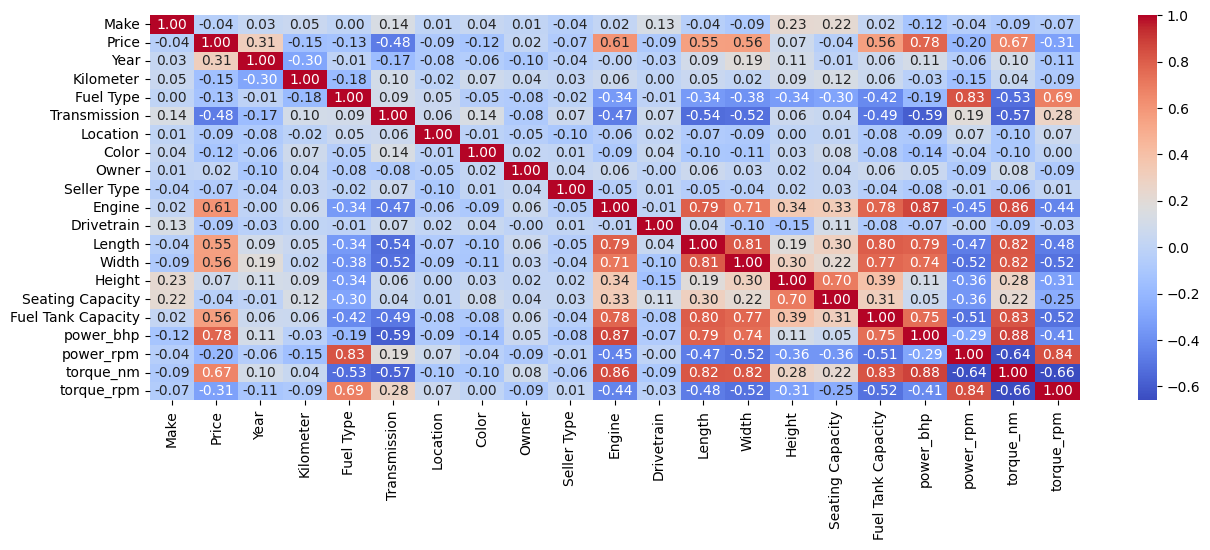

In [56]:
plt.figure(figsize = (15, 5))
sns.heatmap(df_copy.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

## Plotting Graphs and Plot

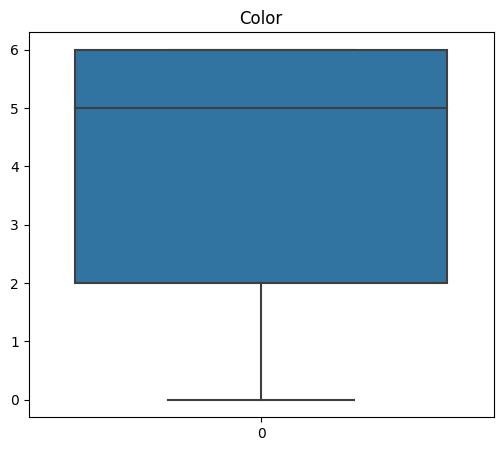

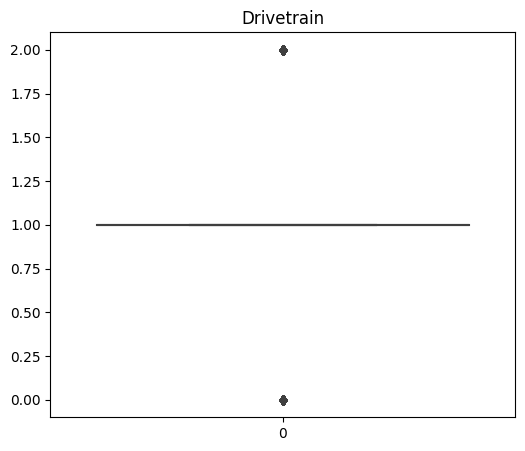

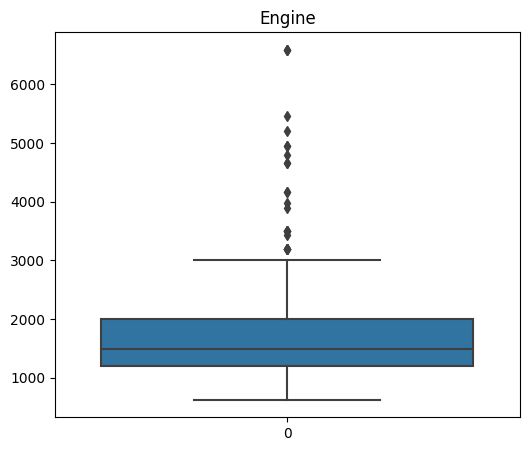

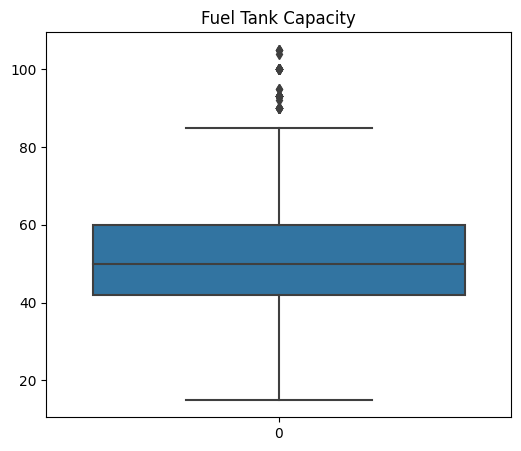

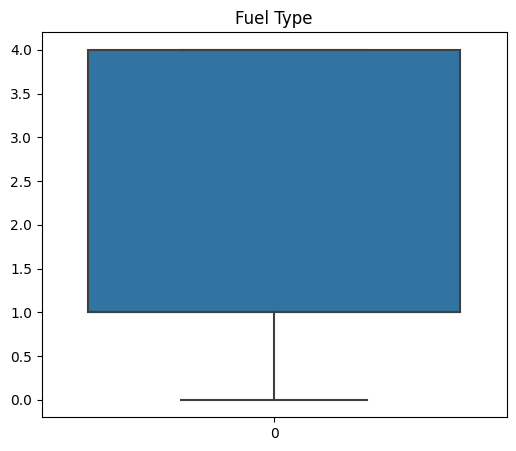

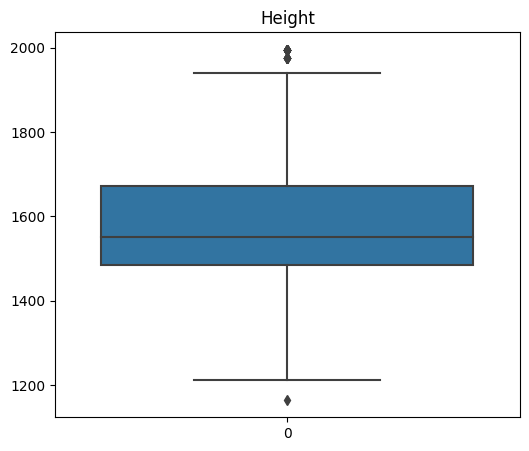

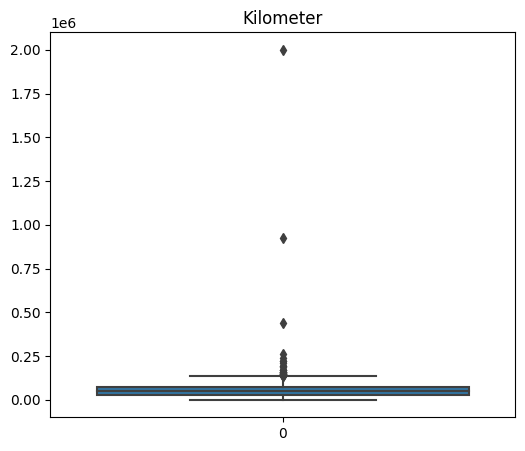

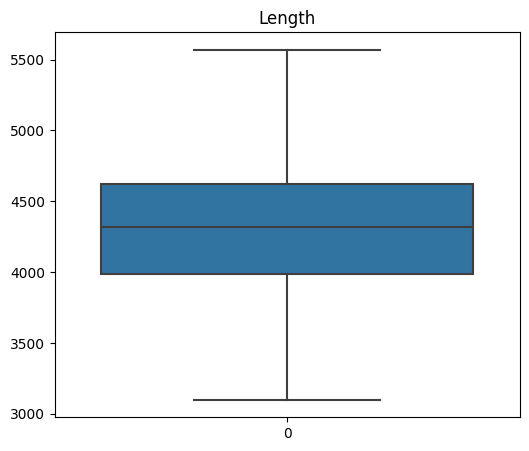

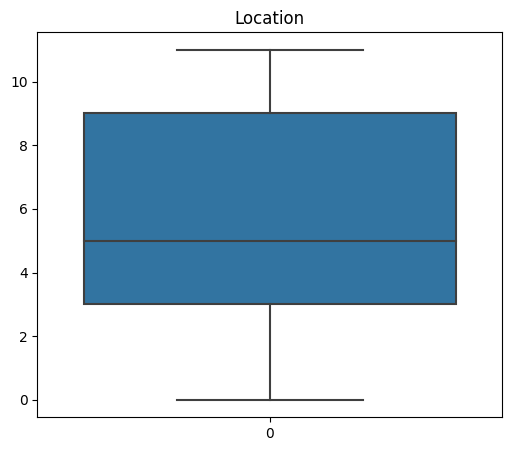

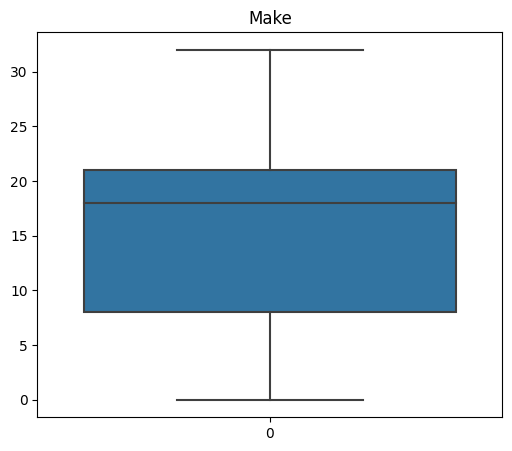

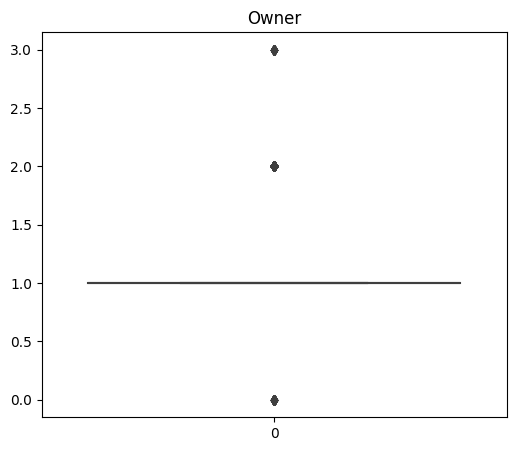

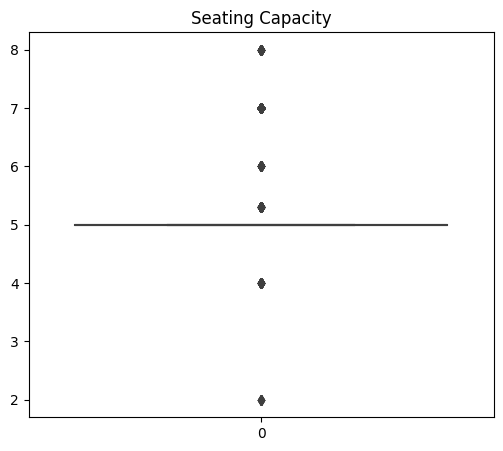

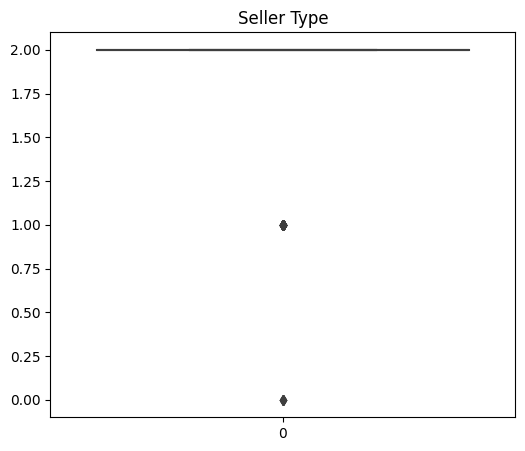

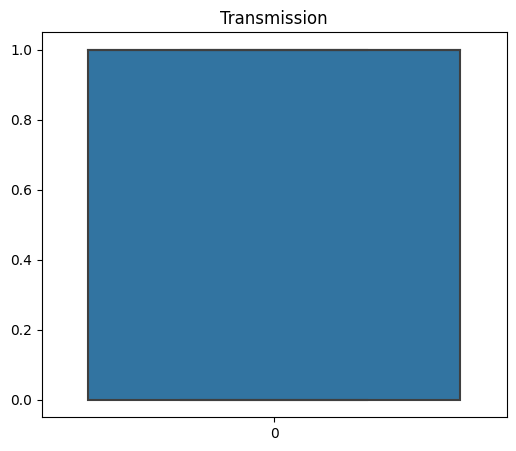

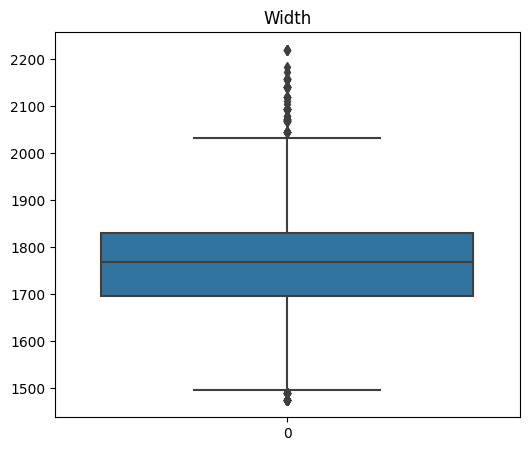

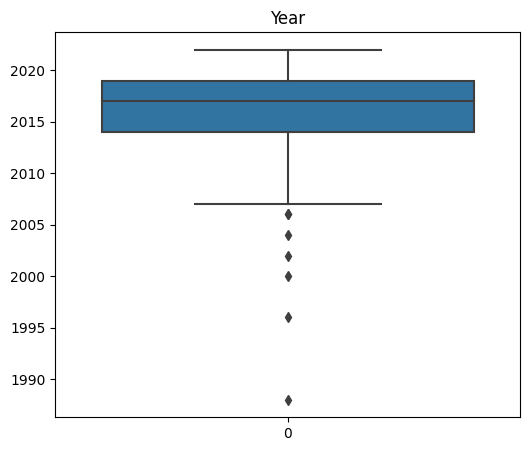

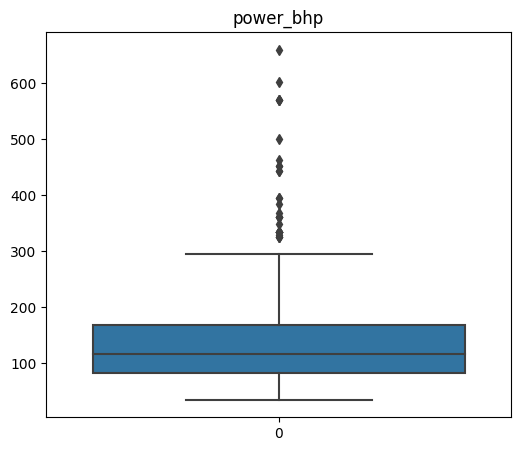

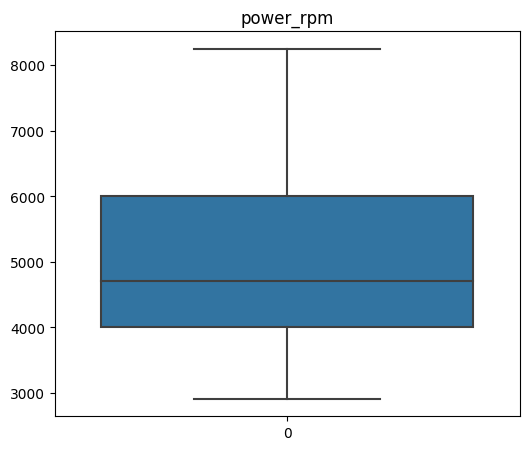

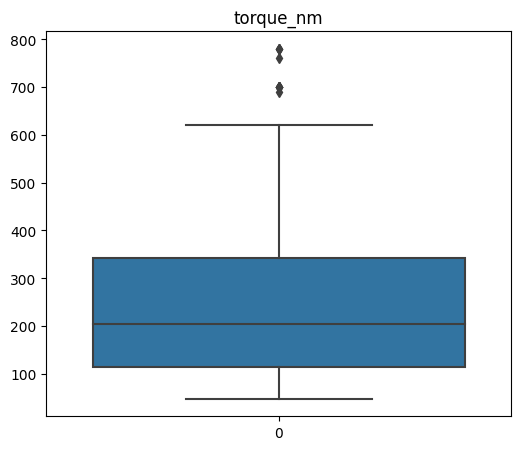

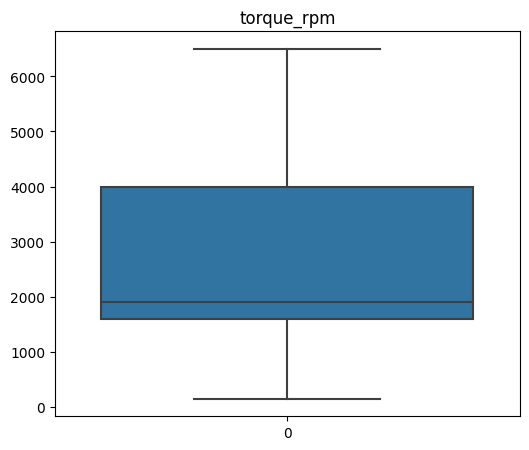

In [57]:
cols_valid = df_copy.columns.difference(['Price'])
for col in cols_valid:
    plt.figure(figsize=(6, 5))
    sns.boxplot(df_copy[col])
    plt.title(col)
    plt.show()

## Feature Scaling

In [58]:
# Initialize scaler
scaler = StandardScaler()

# Get columns to scale (excluding 'Price')
cols_to_scale = df_copy.columns.difference(['Price'])

# Apply scaling and update the original df_copy
df_copy[cols_to_scale] = scaler.fit_transform(df_copy[cols_to_scale])

# Finding Outlier

In [59]:
for columns in df_copy:
    Q1 = df_copy[columns].quantile(0.25)
    Q3 = df_copy[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[columns] < lower) | (df_copy[columns] > upper)]

    outlier_count = len(outliers)
    total_count = len(df_copy)
    percentage = (outlier_count / total_count) * 100

    print(f"Outlier Count in {columns}: {outlier_count}")
    print(f"Total Rows: {total_count}")
    print(f"Percentage of Outliers: {percentage:.2f}%\n")

Outlier Count in Make: 0
Total Rows: 2059
Percentage of Outliers: 0.00%

Outlier Count in Price: 215
Total Rows: 2059
Percentage of Outliers: 10.44%

Outlier Count in Year: 7
Total Rows: 2059
Percentage of Outliers: 0.34%

Outlier Count in Kilometer: 36
Total Rows: 2059
Percentage of Outliers: 1.75%

Outlier Count in Fuel Type: 0
Total Rows: 2059
Percentage of Outliers: 0.00%

Outlier Count in Transmission: 0
Total Rows: 2059
Percentage of Outliers: 0.00%

Outlier Count in Location: 0
Total Rows: 2059
Percentage of Outliers: 0.00%

Outlier Count in Color: 0
Total Rows: 2059
Percentage of Outliers: 0.00%

Outlier Count in Owner: 440
Total Rows: 2059
Percentage of Outliers: 21.37%

Outlier Count in Seller Type: 62
Total Rows: 2059
Percentage of Outliers: 3.01%

Outlier Count in Engine: 25
Total Rows: 2059
Percentage of Outliers: 1.21%

Outlier Count in Drivetrain: 593
Total Rows: 2059
Percentage of Outliers: 28.80%

Outlier Count in Length: 0
Total Rows: 2059
Percentage of Outliers: 0.00

# Splitting Data

In [60]:
df_copy['Price'] = df_copy['Price']/100000.0

In [61]:
df_copy.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
0,-0.876830,5.05,0.170858,0.574133,1.077358,0.904046,1.010671,-0.955846,-0.389065,-5.075196,...,-0.044388,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720,-0.668095,1.084159,-0.994019,1.590440
1,0.431979,4.50,-0.721270,0.362268,-0.896201,0.904046,-1.145138,0.964239,1.781896,0.170702,...,-0.044388,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074,-0.871918,-0.777208,-0.405676,-0.523995
2,-0.767762,2.20,-1.613398,0.222769,1.077358,0.904046,0.702698,-0.475825,-0.389065,0.170702,...,-0.044388,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720,-0.793525,1.084159,-0.966417,1.167553
3,1.631720,7.99,0.765609,-0.291637,1.077358,0.904046,-1.453110,0.004196,-0.389065,0.170702,...,-0.044388,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535,-0.746489,1.084159,-0.964965,1.336708
4,1.631720,19.50,0.468234,0.257644,-0.896201,0.904046,1.010671,-0.955846,-0.389065,0.170702,...,1.820824,1.042995,0.465828,1.517933,2.093385,0.204127,0.288303,-1.335618,0.705639,-1.031460


In [62]:
X = df_copy.drop('Price', axis=1)
y = df_copy['Price']

In [63]:
X[X.duplicated()]

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
258,-1.531234,-0.423894,0.531412,-0.896201,-1.106138,1.010671,-1.915888,1.781896,0.170702,2.061067e+00,-1.909600,1.389788e+00,1.277165e+00,1.271496e+00,-0.378532,4.838251e-16,2.012955e+00,-7.772080e-01,2.281818,-9.468824e-01
923,1.086383,0.170858,-0.675139,1.077358,0.904046,1.010671,-0.475825,-0.389065,0.170702,-1.416245e+00,-0.044388,-1.382258e+00,-1.419779e+00,-8.493487e-01,-0.378532,-1.634366e+00,-1.201170e+00,7.844792e-01,-1.262768,1.494022e+00
1058,0.431979,-0.423894,0.235637,-1.554054,0.904046,-0.529192,0.964239,1.781896,0.170702,-1.100846e+00,-0.044388,-1.565989e+00,-2.050819e+00,8.084949e-01,-0.378532,-1.157720e+00,-1.122776e+00,1.270296e+00,-1.226450,7.446658e-01
1153,-0.767762,-0.423894,0.069319,1.077358,-1.106138,1.010671,0.484218,-0.389065,0.170702,-1.609890e-01,-0.044388,2.047211e-01,-5.107815e-01,-8.717520e-01,-0.378532,-6.129815e-01,-1.350211e-01,1.363364e+00,-0.638107,1.336708e+00
1217,0.431979,0.765609,-0.738489,1.077358,-1.106138,1.010671,0.964239,-0.389065,0.170702,-7.854470e-01,-0.044388,-1.012498e+00,-2.478483e-01,-4.610249e-01,-0.378532,-1.021535e+00,-7.464887e-01,1.084159e+00,-0.964965,1.336708e+00
1432,-0.004291,0.170858,-0.403951,1.077358,-1.106138,-1.453110,-0.475825,-0.389065,0.170702,1.270193e+00,1.820824,1.456390e+00,3.907040e-01,-1.058446e+00,-0.378532,8.850499e-01,1.134950e+00,8.049542e-01,-0.238615,1.590440e+00
1555,-0.767762,1.062985,-0.034678,1.077358,0.904046,-1.453110,0.484218,-0.389065,0.170702,-7.854470e-01,-0.044388,-1.184747e+00,-8.112767e-01,-5.357026e-01,-0.378532,-6.129815e-01,-7.621674e-01,1.084159e+00,-0.957701,1.167553e+00
1603,0.650114,1.360361,-0.718854,-0.896201,-1.106138,-0.529192,-1.915888,-0.389065,0.170702,4.079969e-01,1.820824,1.796293e+00,6.911991e-01,-7.298644e-01,-0.378532,1.906435e+00,9.781636e-01,-9.633448e-01,1.119658,-8.623050e-01
1682,0.431979,-1.613398,0.081316,1.077358,0.904046,-0.529192,-0.475825,1.781896,0.170702,3.603688e-16,-0.044388,2.088783e-15,-1.708117e-15,-1.697973e-15,0.000000,4.838251e-16,4.456143e-16,8.464519e-16,0.000000,3.846135e-16
1847,-0.767762,0.170858,0.187894,-0.896201,0.904046,-1.761083,0.964239,-0.389065,0.170702,-4.700482e-01,-0.044388,-6.794856e-01,-2.553606e-01,-6.477190e-01,-0.378532,-4.767968e-01,-6.367381e-01,-7.772080e-01,-0.187771,-9.468824e-01


In [64]:
duplicate_indices = X[X.duplicated()].index
print(duplicate_indices)

Index([258, 923, 1058, 1153, 1217, 1432, 1555, 1603, 1682, 1847, 1856, 1909,
       1977],
      dtype='int64')


In [65]:
X = X.drop(index=duplicate_indices)
y = y.drop(index=duplicate_indices)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [67]:
X_train.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
1897,-0.876830,-0.423894,-0.073668,1.077358,-1.106138,1.010671,-0.475825,-0.389065,0.170702,0.482488,-0.044388,0.606633,0.390704,0.696478,-0.378532,0.408404,0.382375,1.549501,-0.405676,1.421285
1954,0.431979,-0.423894,-0.108543,1.077358,0.904046,1.010671,-0.955846,-0.389065,0.170702,-0.785447,-0.044388,-0.656519,-0.172724,-0.685058,-0.378532,-1.021535,-0.730810,1.084159,-0.950438,1.167553
930,-0.767762,-0.721270,0.554080,-0.896201,0.904046,0.702698,0.484218,-0.389065,0.170702,-0.175253,-0.044388,0.204721,-0.510782,-0.871752,-0.378532,-0.612981,-0.056628,-0.777208,0.102769,-0.608573
1735,0.322912,0.170858,0.240206,-0.896201,0.904046,-0.529192,0.964239,-0.389065,0.170702,0.770943,1.820824,0.402232,0.390704,3.011485,3.329344,0.544588,-0.150700,-0.777208,0.248039,-0.693150
1892,-0.767762,-2.208150,1.422414,1.077358,0.904046,0.702698,0.484218,1.781896,0.170702,-0.961373,-0.044388,-1.644075,-1.299581,-0.311670,-0.378532,-1.157720,-0.981669,0.618817,-1.066654,0.152624


In [68]:
X_test.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_bhp,power_rpm,torque_nm,torque_rpm
269,0.431979,-0.126518,0.344831,1.077358,0.904046,0.394725,0.964239,-0.389065,0.170702,-0.785447,-0.044388,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074,-0.730810,1.084159,-0.950438,1.167553
1901,0.431979,1.360361,-0.701417,-1.554054,0.904046,-1.145138,-0.955846,-0.389065,0.170702,-1.420999,-0.044388,-2.034504,-2.088381,-0.871752,-0.378532,-1.157720,-1.295242,1.084159,-1.284558,0.744666
1477,0.868248,-0.721270,0.187894,-0.896201,0.904046,-1.761083,-0.475825,-0.389065,0.170702,-0.367028,-0.044388,0.115152,0.405729,0.591930,-0.378532,-0.136335,-0.338844,-0.870276,0.015607,-0.312552
502,-1.640302,-0.423894,0.449456,-0.896201,-1.106138,-0.837165,0.484218,-0.389065,0.170702,0.436525,-1.909600,0.239171,0.473340,0.121461,-0.378532,0.816958,0.695948,-0.591071,0.974388,-0.735439
285,1.522653,0.468234,-0.282918,-0.896201,0.904046,1.010671,0.964239,-0.389065,0.170702,0.770943,1.820824,1.164717,1.014231,1.488061,2.093385,0.544588,0.288303,-0.777208,0.538579,-0.777728


In [69]:
y_train.head()

1897    11.30
1954     4.75
930      5.40
1735     9.85
1892     1.70
Name: Price, dtype: float64

# Trying Out Different Models

## Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred_lr = lr.predict(X_test)

In [72]:
def get_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test,y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print("Mean absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:",rmse)
    print("R² Score:", r2)

In [73]:
get_metrics(y_test,y_pred_lr)

Mean absolute Error: 7.277900582979177
Mean Squared Error: 187.03597426865497
Root Mean Squared Error: 13.676109617455358
R² Score: 0.6018061814403227


## Decision Tree

In [74]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
y_pred_dt=dt.predict(X_test)

In [76]:
get_metrics(y_test,y_pred_dt)

Mean absolute Error: 3.171195219512195
Mean Squared Error: 36.29354509659561
Root Mean Squared Error: 6.02441242749827
R² Score: 0.9227321622613472


## Random Forest

In [77]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred_rf=rf.predict(X_test)

In [79]:
get_metrics(y_test,y_pred_rf)

Mean absolute Error: 2.6819224914634137
Mean Squared Error: 54.81648493889103
Root Mean Squared Error: 7.4038155662395475
R² Score: 0.8832973948290647


## Lightgbm

In [80]:
lgb_model = lgb.LGBMRegressor(random_state=42, force_col_wise=True)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 20
[LightGBM] [Info] Start training from score 17.130519


LGBMRegressor(force_col_wise=True, random_state=42)

In [81]:
y_pred_gbm=lgb_model.predict(X_test)

In [82]:
get_metrics(y_test,y_pred_gbm)

Mean absolute Error: 2.922316063249848
Mean Squared Error: 56.330480916159765
Root Mean Squared Error: 7.505363476618555
R² Score: 0.88007414410508


## XGBoost

In [83]:
xgb_model = xgb.XGBRegressor( random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [84]:
y_pred_xg=xgb_model.predict(X_test)

In [85]:
get_metrics(y_test,y_pred_xg)

Mean absolute Error: 2.474367014562839
Mean Squared Error: 35.19843188444861
Root Mean Squared Error: 5.932826635293552
R² Score: 0.9250636245022614


# Checking for overfitting

In [86]:
def evaluate_model_overfitting(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae= mean_absolute_error(y_train,y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae= mean_absolute_error(y_test,y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    print("Training Performance:")
    print(f"MAE: {train_mae:.2f}")
    print(f"MSE: {train_mse:.2f}")
    print(f"RMSE: {train_rmse:.2f}")
    print(f"R² Score : {train_r2:.4f}")
        
    print("\nTesting Performance:")
    print(f"MAE: {test_mae:.4f}")
    print(f"MSE: {test_mse:.4f}")
    print(f"RMSE: {test_rmse:.2f}")
    print(f"R² Score: {test_r2:.4f}")


In [87]:
evaluate_model_overfitting(dt,X_train, X_test, y_train, y_test)

Training Performance:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R² Score : 1.0000

Testing Performance:
MAE: 3.1712
MSE: 36.2935
RMSE: 6.02
R² Score: 0.9227


In [88]:
evaluate_model_overfitting(lr,X_train, X_test, y_train, y_test)


Training Performance:
MAE: 7.68
MSE: 186.69
RMSE: 13.66
R² Score : 0.6956

Testing Performance:
MAE: 7.2779
MSE: 187.0360
RMSE: 13.68
R² Score: 0.6018


In [89]:
evaluate_model_overfitting(rf,X_train, X_test, y_train, y_test)


Training Performance:
MAE: 1.13
MSE: 11.74
RMSE: 3.43
R² Score : 0.9809

Testing Performance:
MAE: 2.6819
MSE: 54.8165
RMSE: 7.40
R² Score: 0.8833


In [90]:
evaluate_model_overfitting(lgb_model,X_train, X_test, y_train, y_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 20
[LightGBM] [Info] Start training from score 17.130519
Training Performance:
MAE: 1.83
MSE: 33.71
RMSE: 5.81
R² Score : 0.9450

Testing Performance:
MAE: 2.9223
MSE: 56.3305
RMSE: 7.51
R² Score: 0.8801


In [91]:
evaluate_model_overfitting(xgb_model,X_train, X_test, y_train, y_test)


Training Performance:
MAE: 0.31
MSE: 0.20
RMSE: 0.45
R² Score : 0.9997

Testing Performance:
MAE: 2.4744
MSE: 35.1984
RMSE: 5.93
R² Score: 0.9251


# Hyperparameter tuning

In [92]:
params =  {'n_estimators': 921, 'max_depth': 5, 'learning_rate': 0.19154664262765328, 'subsample': 0.9882655301600328, 'colsample_bytree': 0.529128686416979, 'gamma': 0.007103130301839489, 'reg_alpha': 0.035728728128635256, 'reg_lambda': 8.123510985466274e-08}
model_xg = xgb.XGBRegressor(**params, random_state=2)

In [93]:
model_xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.529128686416979, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.007103130301839489,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.19154664262765328,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=921, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [94]:
xg_pred = model_xg.predict(X_test)

In [95]:
get_metrics(y_test,xg_pred)

Mean absolute Error: 2.5166440819435465
Mean Squared Error: 37.21838950559869
Root Mean Squared Error: 6.1006876256368585
R² Score: 0.9207631970489891


In [96]:
df_copy.shape

(2059, 21)

# Saving Model

In [97]:
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(model_xg, f)

In [98]:
with open("xgboost_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)